In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

file_key_1 = 'Tabular-Playground-Series/Tabular-Playground-Sep-2022/train.csv'
file_key_2 = 'Tabular-Playground-Series/Tabular-Playground-Sep-2022/test.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Reading data-files
train = pd.read_csv(file_content_stream_1)
train['date'] = pd.to_datetime(train['date'], format = '%Y-%m-%d')

test = pd.read_csv(file_content_stream_2)
test['date'] = pd.to_datetime(test['date'], format = '%Y-%m-%d')

# Train Dataset Exploration

In [2]:
train.head(20)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463


In [ ]:
train['date'].describe()

In [8]:
train['product'].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

In [12]:
train['store'].value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [ ]:
train['country'].value_counts()

In [15]:
pd.crosstab(train['country'], train['store'])

store,KaggleMart,KaggleRama
country,,
Belgium,5844,5844
France,5844,5844
Germany,5844,5844
Italy,5844,5844
Poland,5844,5844
Spain,5844,5844


# Belgium

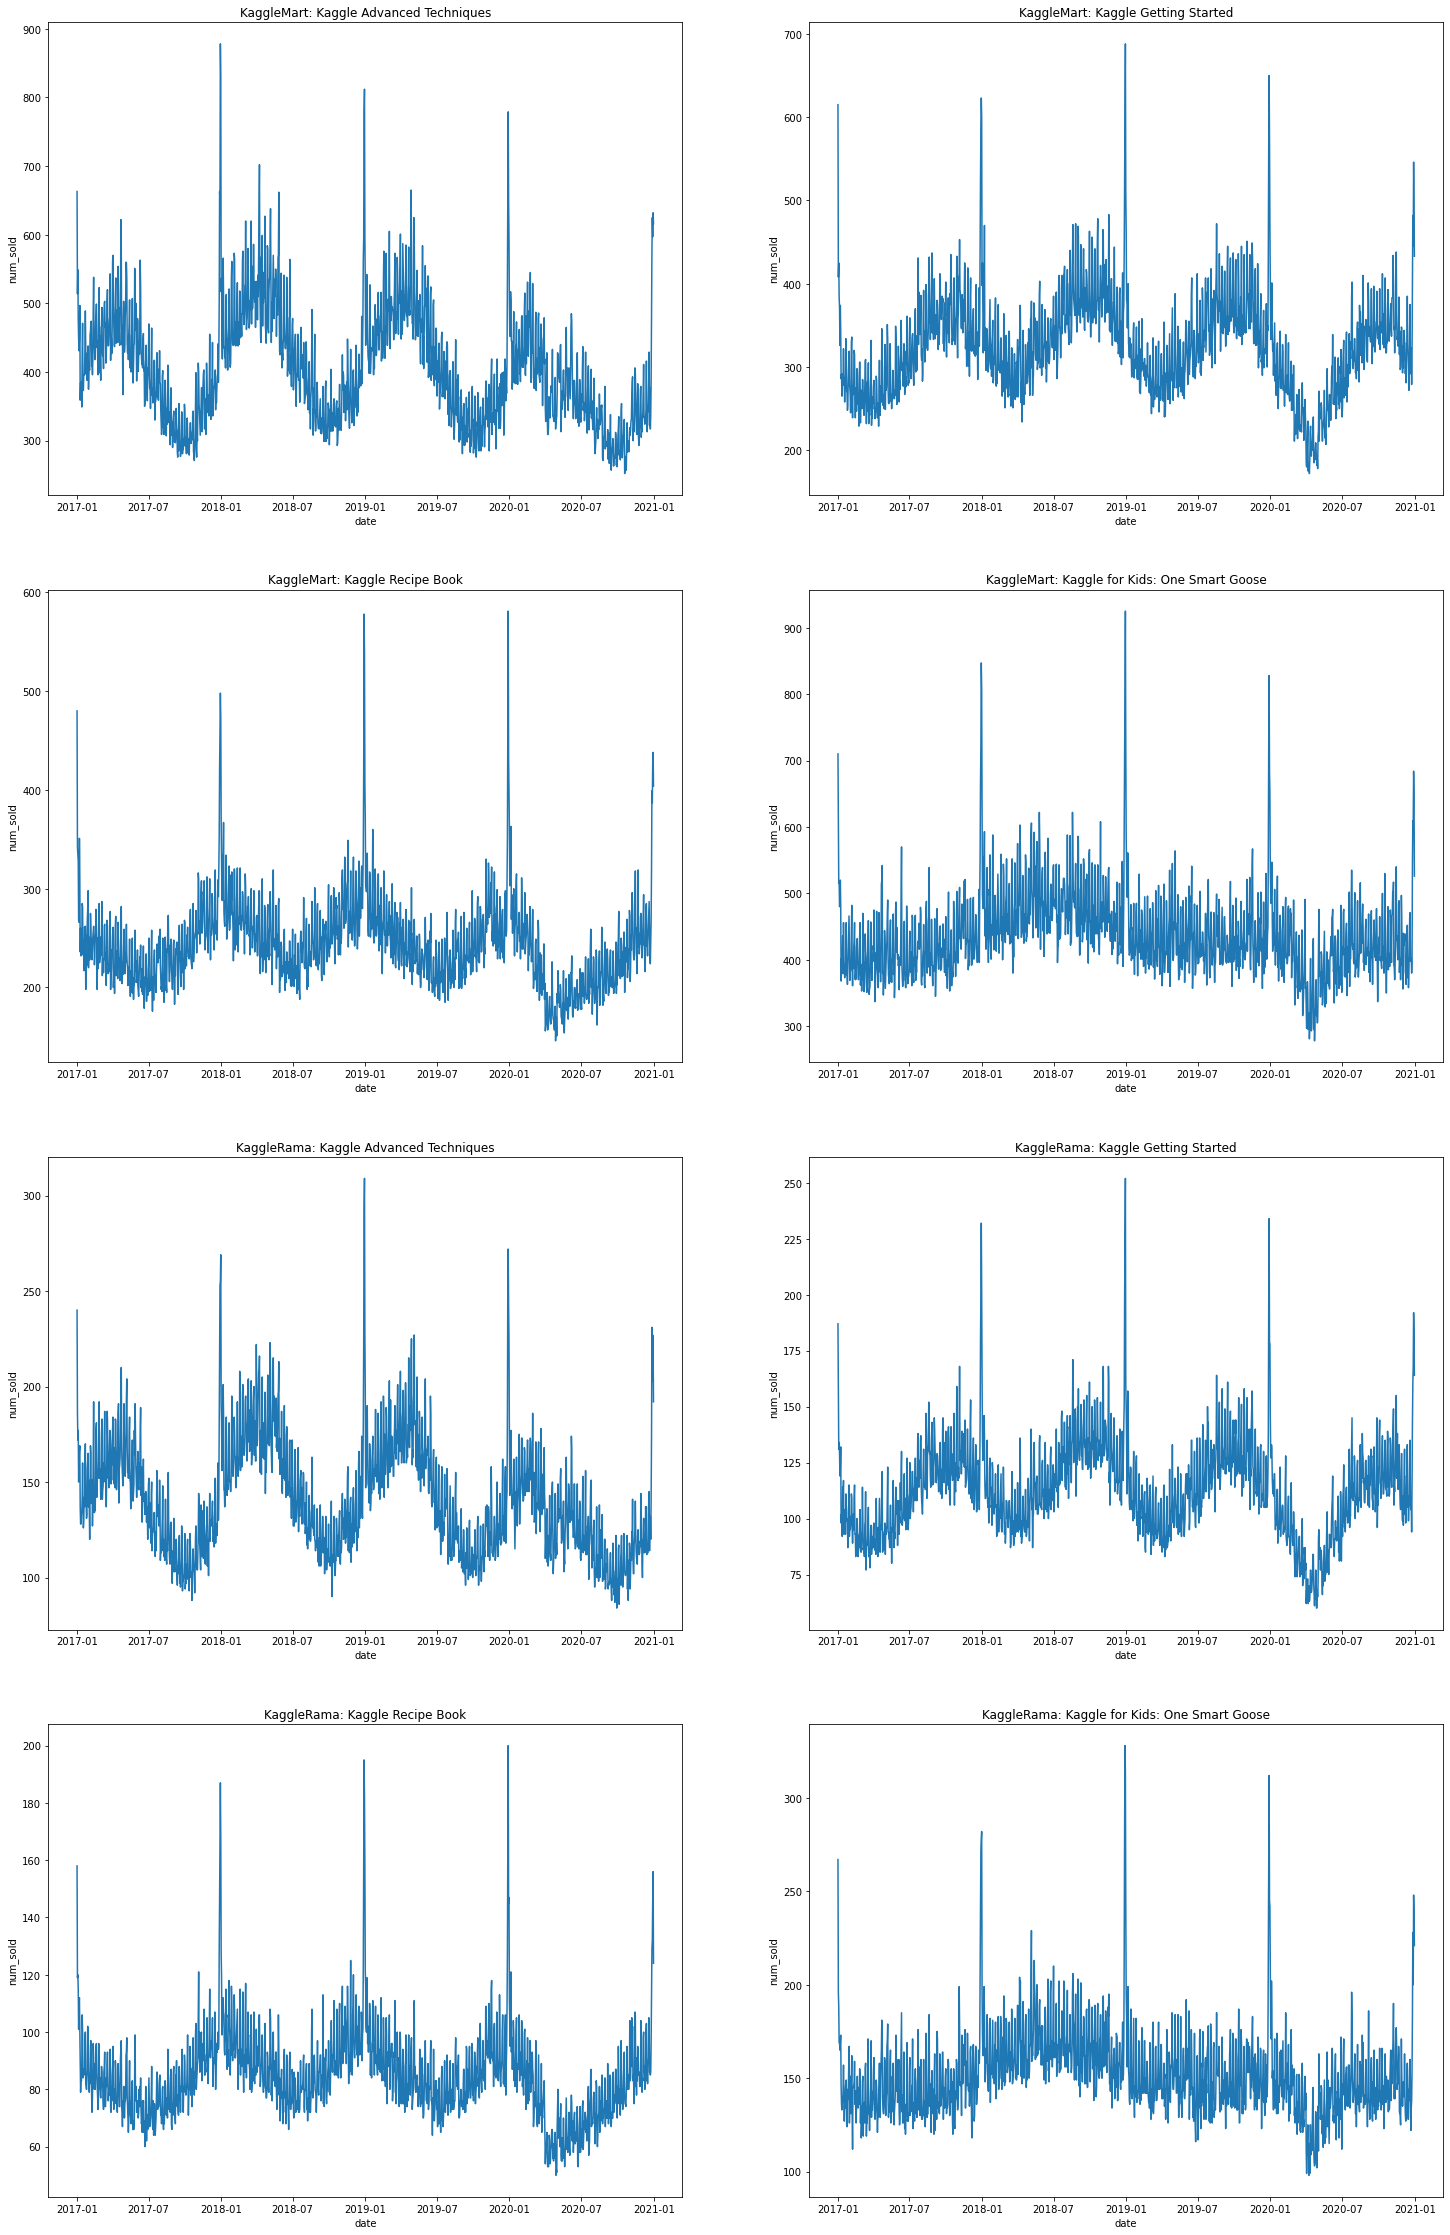

In [22]:
data_temp_1 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_2 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_3 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_4 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

data_temp_5 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_6 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_7 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_8 = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

fig, axes = plt.subplots(4, 2, figsize = (25, 40))

sns.lineplot(ax = axes[0, 0], x = 'date', y = 'num_sold', data = data_temp_1).set(title = 'KaggleMart: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[0, 1], x = 'date', y = 'num_sold', data = data_temp_2).set(title = 'KaggleMart: Kaggle Getting Started')
sns.lineplot(ax = axes[1, 0], x = 'date', y = 'num_sold', data = data_temp_3).set(title = 'KaggleMart: Kaggle Recipe Book')
sns.lineplot(ax = axes[1, 1], x = 'date', y = 'num_sold', data = data_temp_4).set(title = 'KaggleMart: Kaggle for Kids: One Smart Goose')
sns.lineplot(ax = axes[2, 0], x = 'date', y = 'num_sold', data = data_temp_5).set(title = 'KaggleRama: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[2, 1], x = 'date', y = 'num_sold', data = data_temp_6).set(title = 'KaggleRama: Kaggle Getting Started')
sns.lineplot(ax = axes[3, 0], x = 'date', y = 'num_sold', data = data_temp_7).set(title = 'KaggleRama: Kaggle Recipe Book')
sns.lineplot(ax = axes[3, 1], x = 'date', y = 'num_sold', data = data_temp_8).set(title = 'KaggleRama: Kaggle for Kids: One Smart Goose')

plt.show();

# France

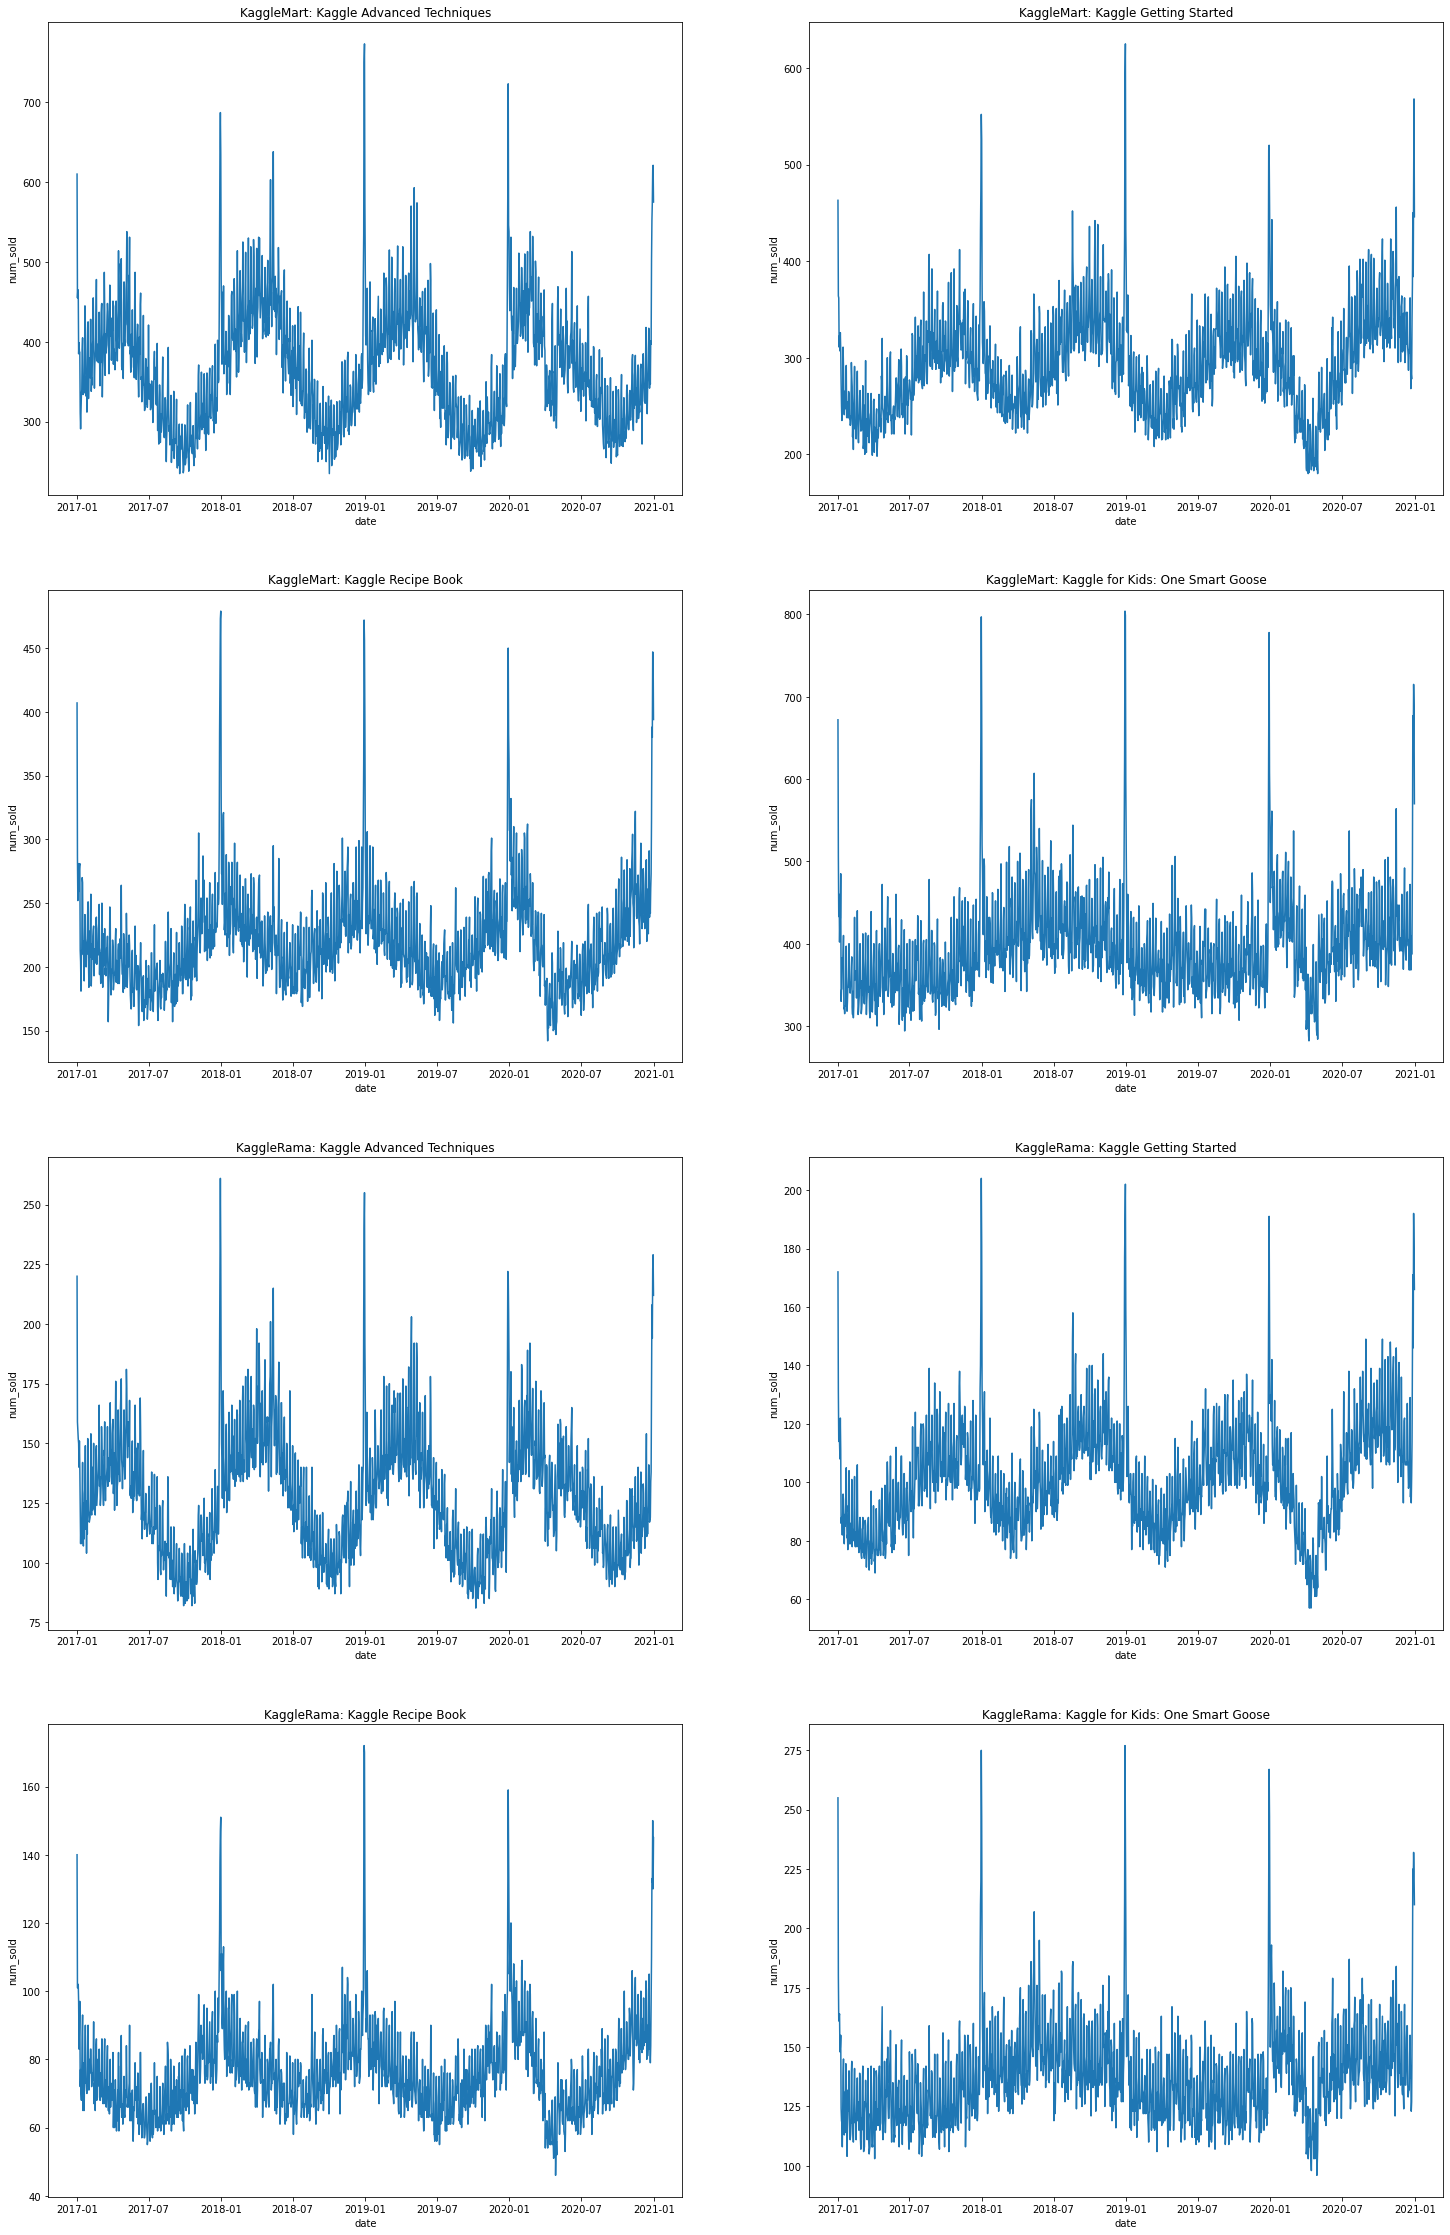

In [21]:
data_temp_1 = train[(train['country'] == 'France') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_2 = train[(train['country'] == 'France') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_3 = train[(train['country'] == 'France') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_4 = train[(train['country'] == 'France') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

data_temp_5 = train[(train['country'] == 'France') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_6 = train[(train['country'] == 'France') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_7 = train[(train['country'] == 'France') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_8 = train[(train['country'] == 'France') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

fig, axes = plt.subplots(4, 2, figsize = (25, 40))

sns.lineplot(ax = axes[0, 0], x = 'date', y = 'num_sold', data = data_temp_1).set(title = 'KaggleMart: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[0, 1], x = 'date', y = 'num_sold', data = data_temp_2).set(title = 'KaggleMart: Kaggle Getting Started')
sns.lineplot(ax = axes[1, 0], x = 'date', y = 'num_sold', data = data_temp_3).set(title = 'KaggleMart: Kaggle Recipe Book')
sns.lineplot(ax = axes[1, 1], x = 'date', y = 'num_sold', data = data_temp_4).set(title = 'KaggleMart: Kaggle for Kids: One Smart Goose')
sns.lineplot(ax = axes[2, 0], x = 'date', y = 'num_sold', data = data_temp_5).set(title = 'KaggleRama: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[2, 1], x = 'date', y = 'num_sold', data = data_temp_6).set(title = 'KaggleRama: Kaggle Getting Started')
sns.lineplot(ax = axes[3, 0], x = 'date', y = 'num_sold', data = data_temp_7).set(title = 'KaggleRama: Kaggle Recipe Book')
sns.lineplot(ax = axes[3, 1], x = 'date', y = 'num_sold', data = data_temp_8).set(title = 'KaggleRama: Kaggle for Kids: One Smart Goose')

plt.show();

# Germany

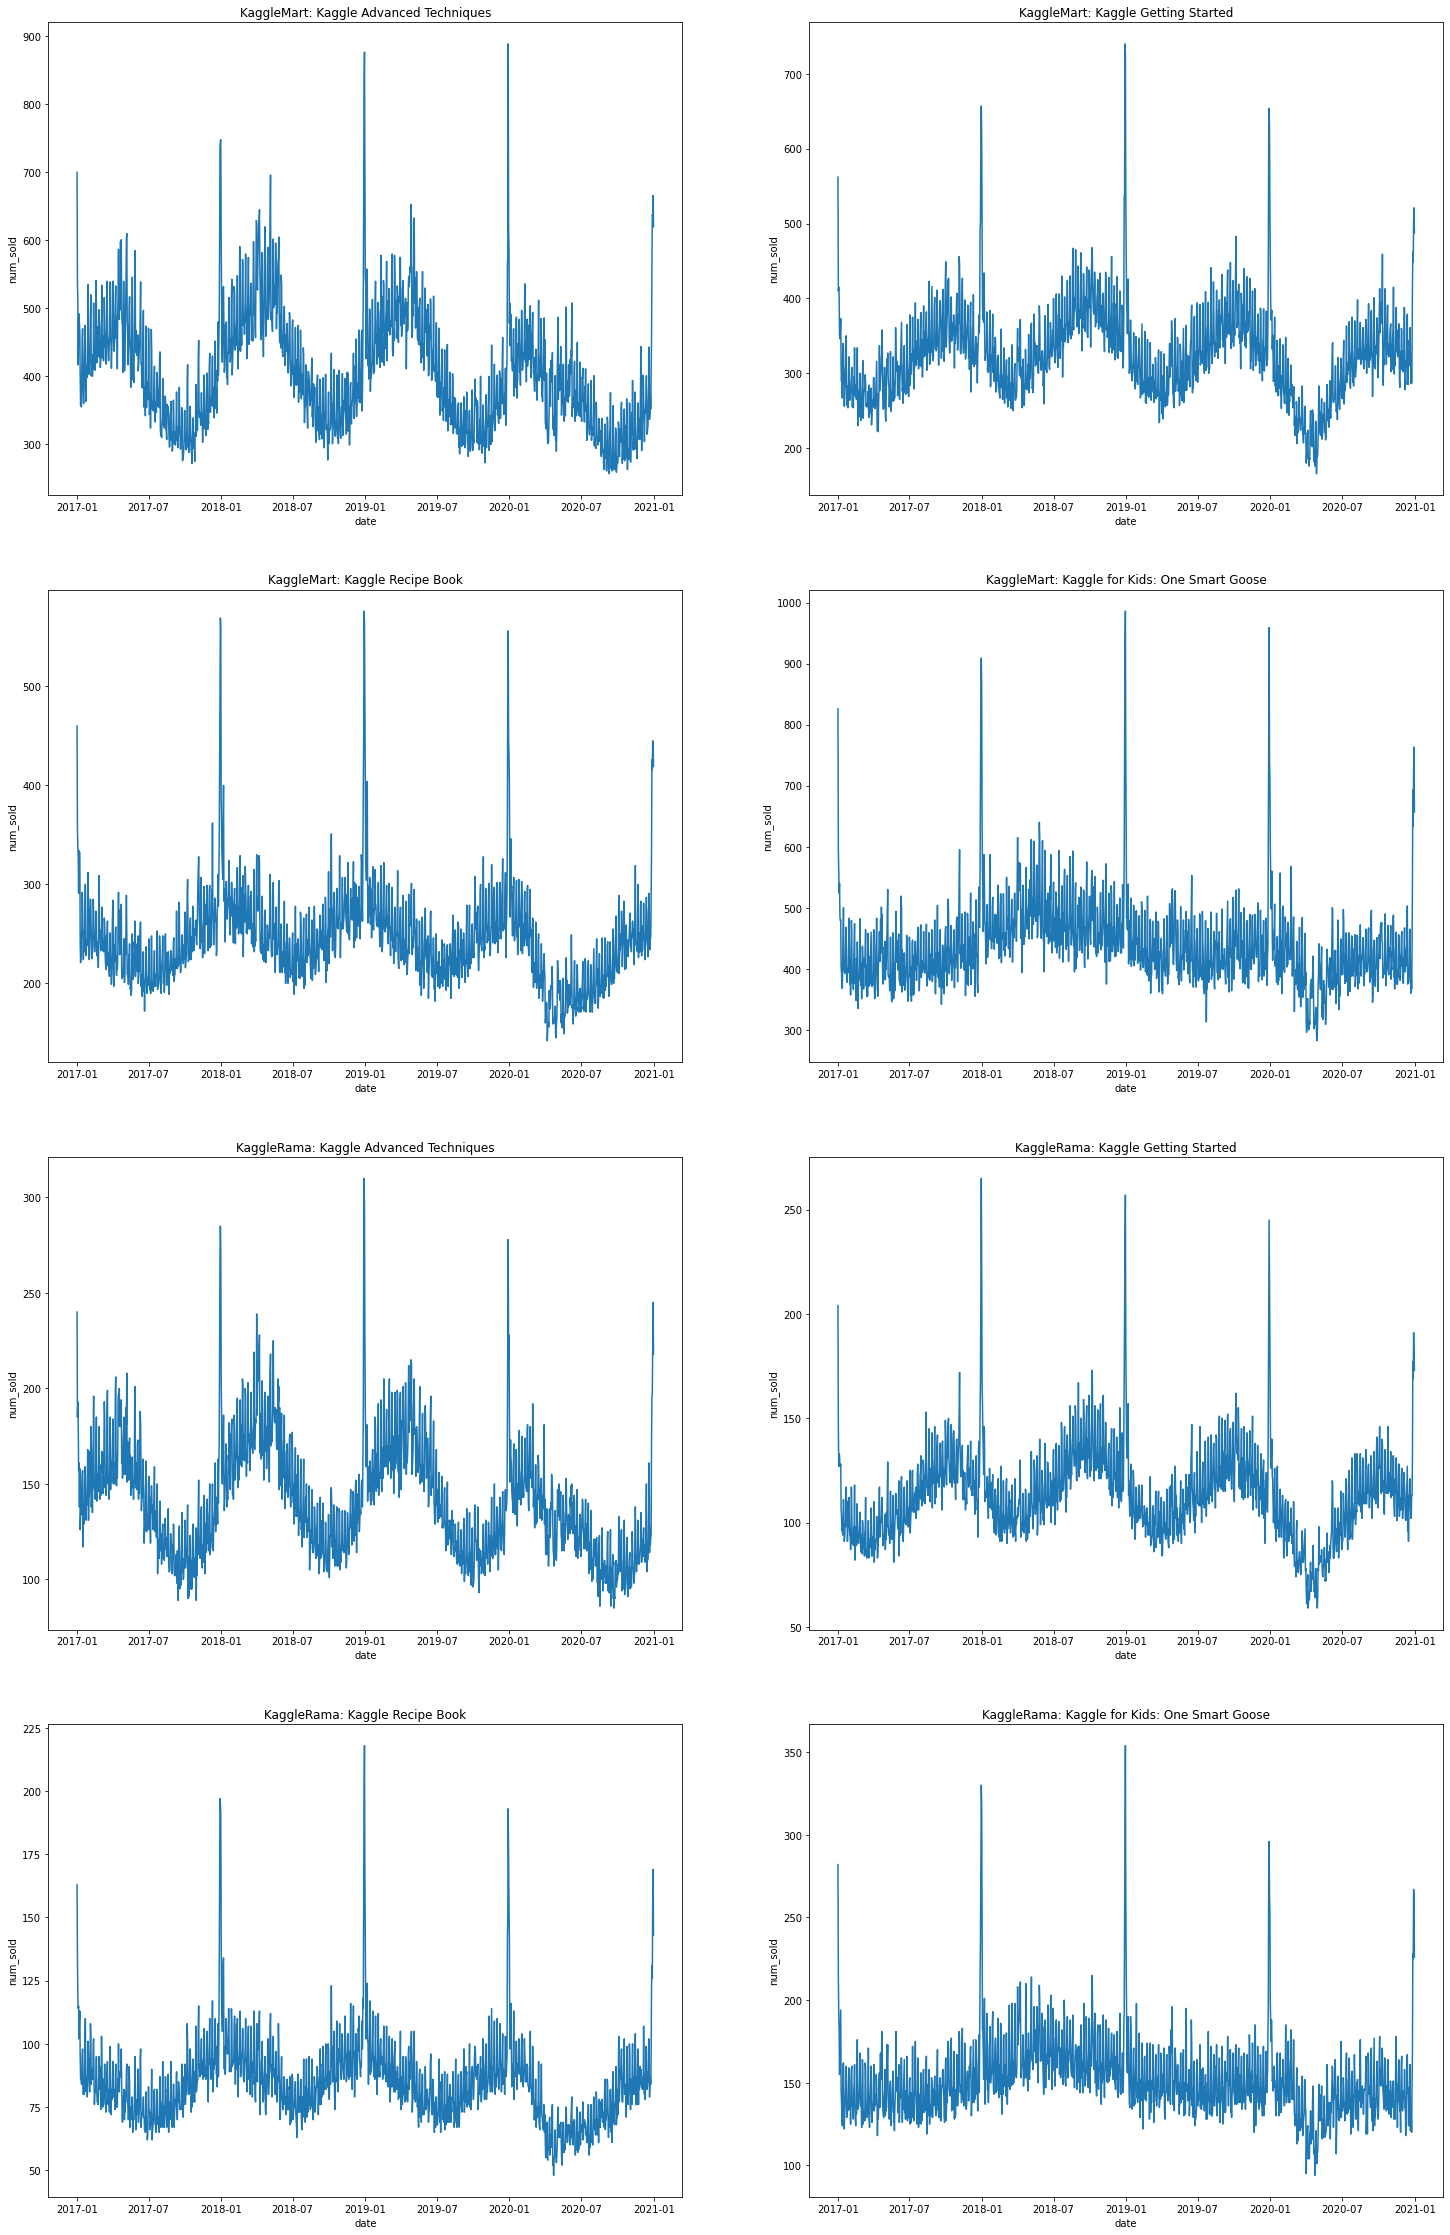

In [23]:
data_temp_1 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_2 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_3 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_4 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

data_temp_5 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_6 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_7 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_8 = train[(train['country'] == 'Germany') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

fig, axes = plt.subplots(4, 2, figsize = (25, 40))

sns.lineplot(ax = axes[0, 0], x = 'date', y = 'num_sold', data = data_temp_1).set(title = 'KaggleMart: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[0, 1], x = 'date', y = 'num_sold', data = data_temp_2).set(title = 'KaggleMart: Kaggle Getting Started')
sns.lineplot(ax = axes[1, 0], x = 'date', y = 'num_sold', data = data_temp_3).set(title = 'KaggleMart: Kaggle Recipe Book')
sns.lineplot(ax = axes[1, 1], x = 'date', y = 'num_sold', data = data_temp_4).set(title = 'KaggleMart: Kaggle for Kids: One Smart Goose')
sns.lineplot(ax = axes[2, 0], x = 'date', y = 'num_sold', data = data_temp_5).set(title = 'KaggleRama: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[2, 1], x = 'date', y = 'num_sold', data = data_temp_6).set(title = 'KaggleRama: Kaggle Getting Started')
sns.lineplot(ax = axes[3, 0], x = 'date', y = 'num_sold', data = data_temp_7).set(title = 'KaggleRama: Kaggle Recipe Book')
sns.lineplot(ax = axes[3, 1], x = 'date', y = 'num_sold', data = data_temp_8).set(title = 'KaggleRama: Kaggle for Kids: One Smart Goose')

plt.show();

# Italy

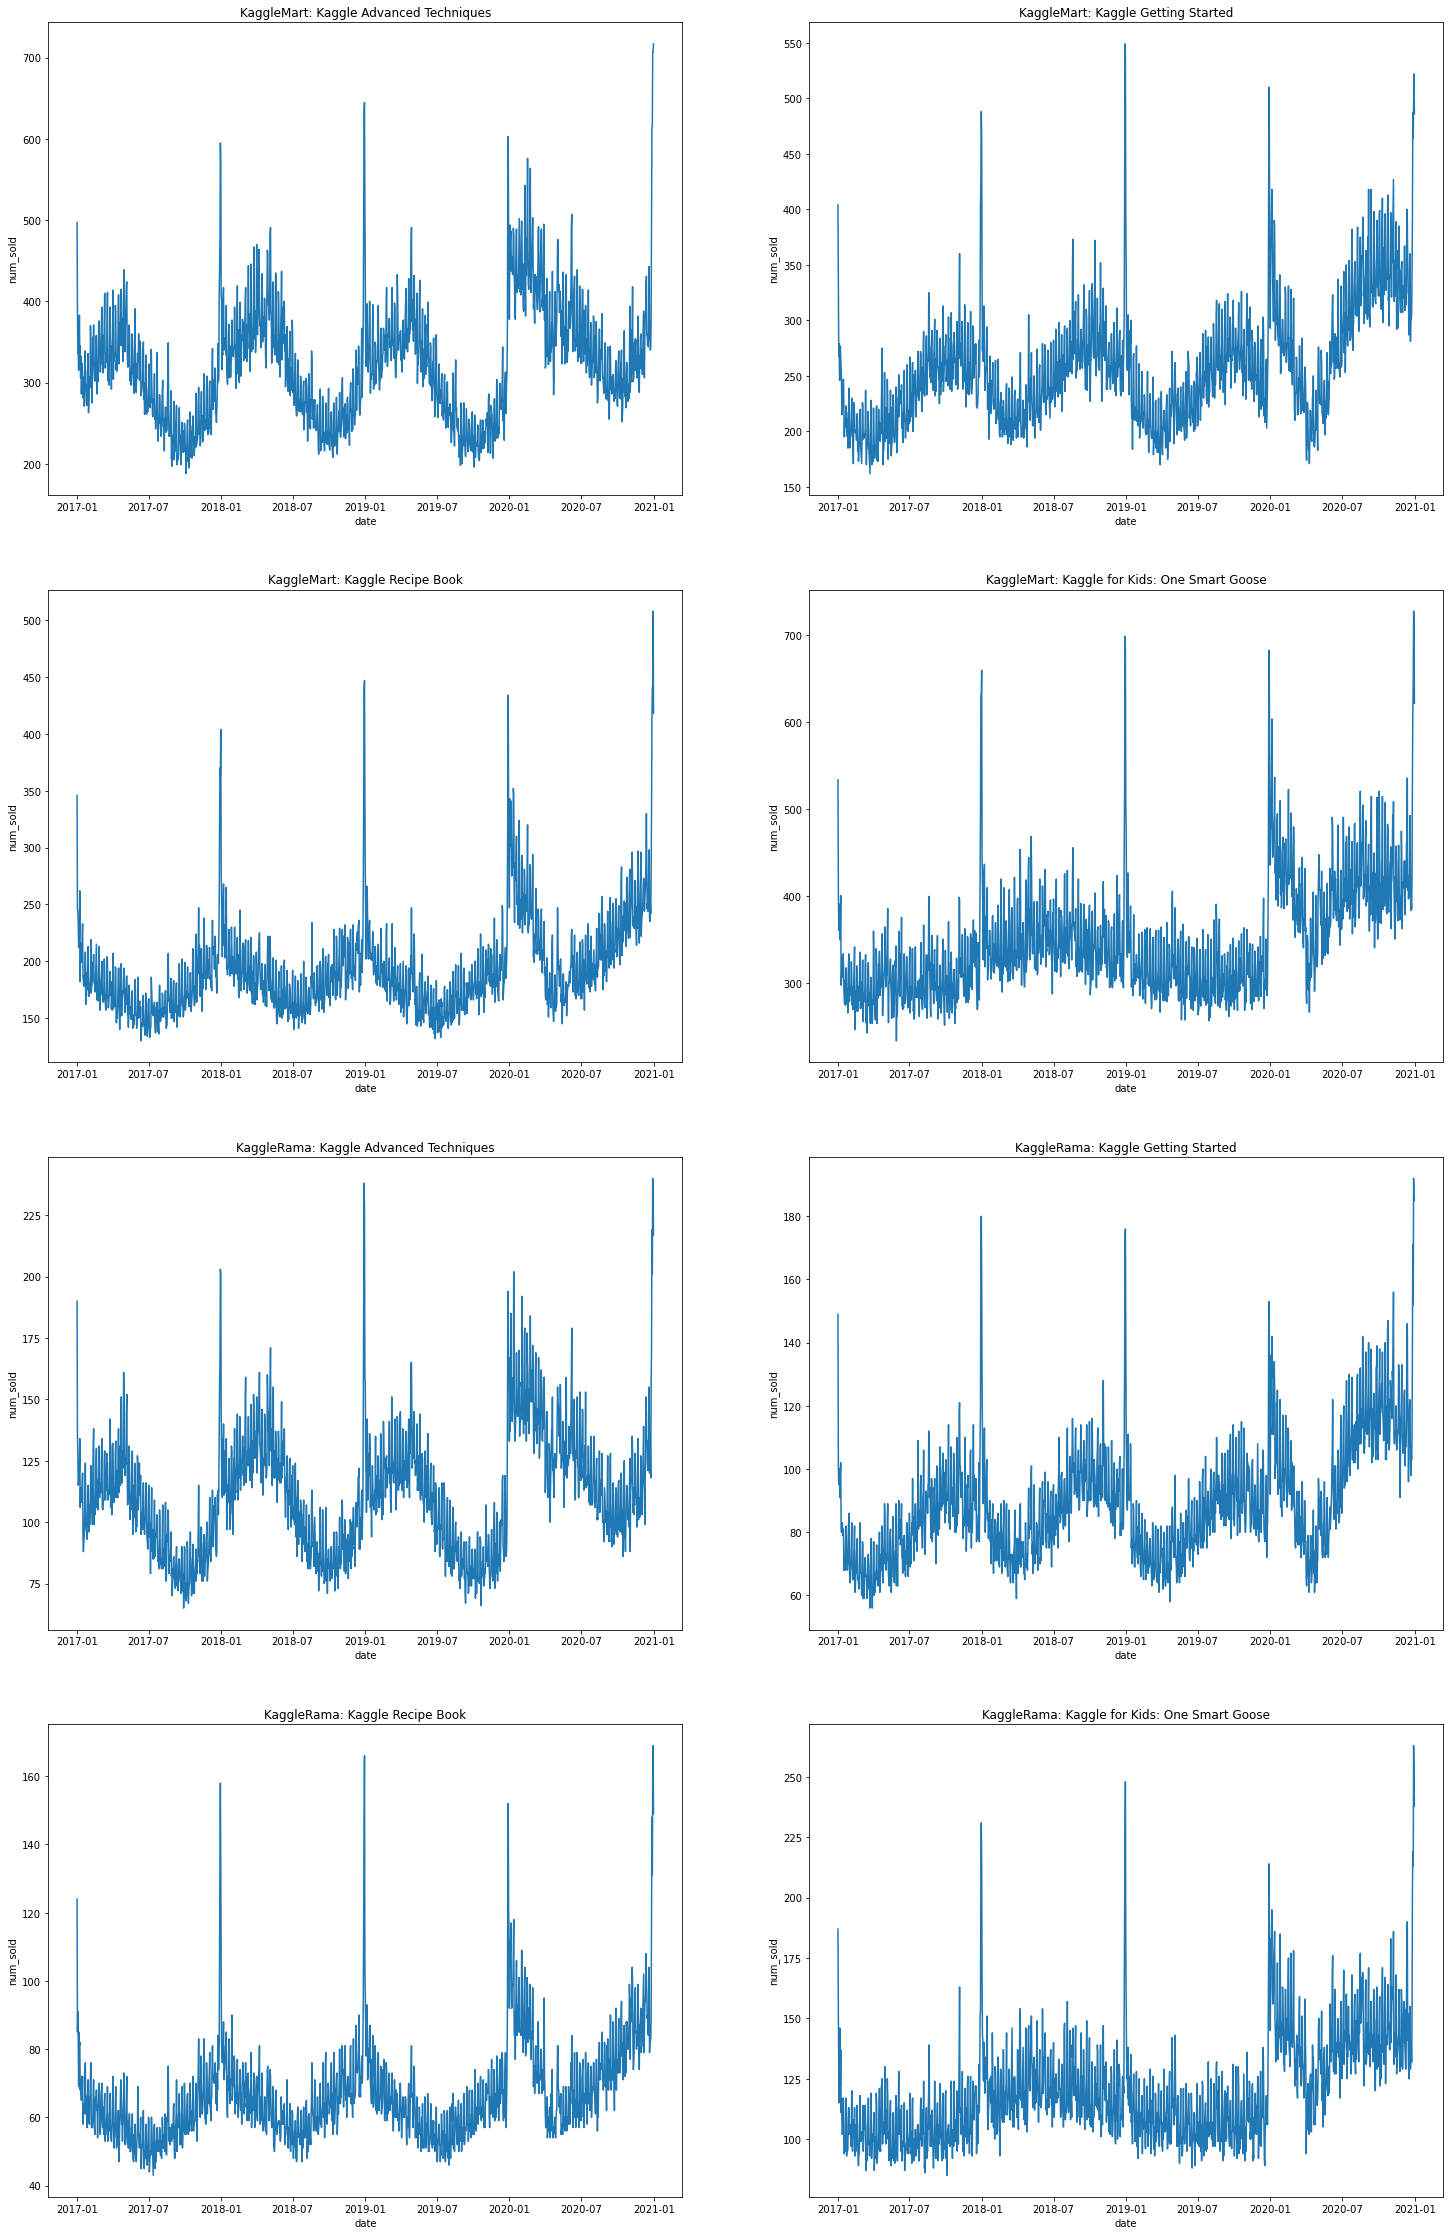

In [24]:
data_temp_1 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_2 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_3 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_4 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

data_temp_5 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_6 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_7 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_8 = train[(train['country'] == 'Italy') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

fig, axes = plt.subplots(4, 2, figsize = (25, 40))

sns.lineplot(ax = axes[0, 0], x = 'date', y = 'num_sold', data = data_temp_1).set(title = 'KaggleMart: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[0, 1], x = 'date', y = 'num_sold', data = data_temp_2).set(title = 'KaggleMart: Kaggle Getting Started')
sns.lineplot(ax = axes[1, 0], x = 'date', y = 'num_sold', data = data_temp_3).set(title = 'KaggleMart: Kaggle Recipe Book')
sns.lineplot(ax = axes[1, 1], x = 'date', y = 'num_sold', data = data_temp_4).set(title = 'KaggleMart: Kaggle for Kids: One Smart Goose')
sns.lineplot(ax = axes[2, 0], x = 'date', y = 'num_sold', data = data_temp_5).set(title = 'KaggleRama: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[2, 1], x = 'date', y = 'num_sold', data = data_temp_6).set(title = 'KaggleRama: Kaggle Getting Started')
sns.lineplot(ax = axes[3, 0], x = 'date', y = 'num_sold', data = data_temp_7).set(title = 'KaggleRama: Kaggle Recipe Book')
sns.lineplot(ax = axes[3, 1], x = 'date', y = 'num_sold', data = data_temp_8).set(title = 'KaggleRama: Kaggle for Kids: One Smart Goose')

plt.show();

# Poland

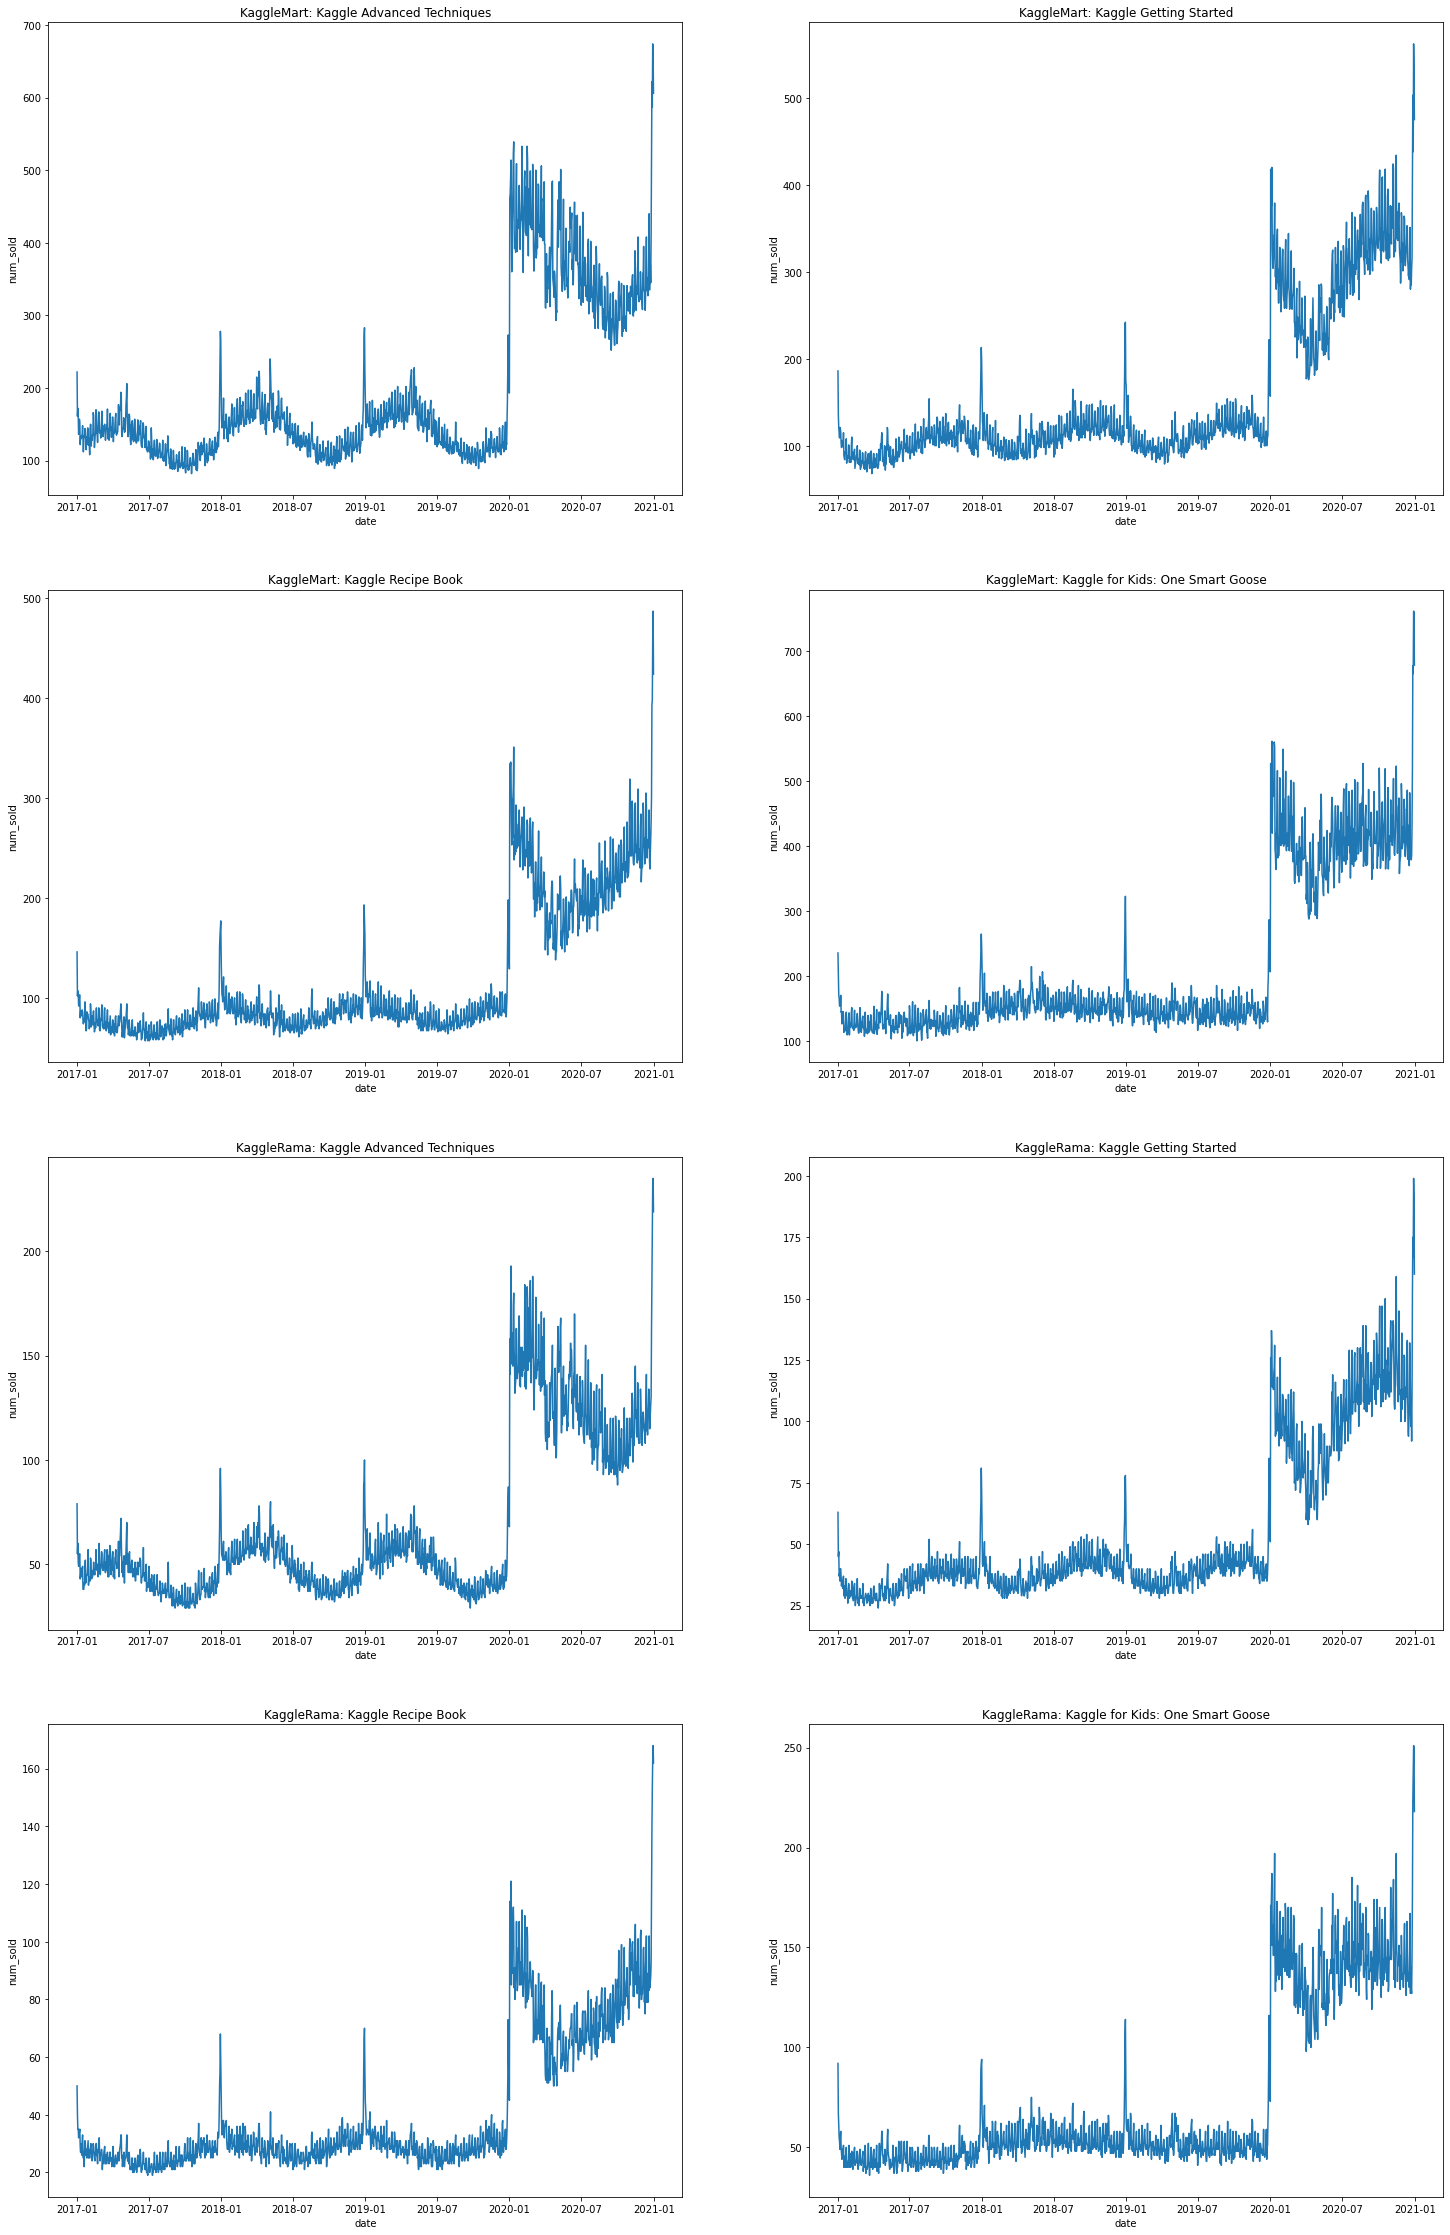

In [25]:
data_temp_1 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_2 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_3 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_4 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

data_temp_5 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_6 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_7 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_8 = train[(train['country'] == 'Poland') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

fig, axes = plt.subplots(4, 2, figsize = (25, 40))

sns.lineplot(ax = axes[0, 0], x = 'date', y = 'num_sold', data = data_temp_1).set(title = 'KaggleMart: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[0, 1], x = 'date', y = 'num_sold', data = data_temp_2).set(title = 'KaggleMart: Kaggle Getting Started')
sns.lineplot(ax = axes[1, 0], x = 'date', y = 'num_sold', data = data_temp_3).set(title = 'KaggleMart: Kaggle Recipe Book')
sns.lineplot(ax = axes[1, 1], x = 'date', y = 'num_sold', data = data_temp_4).set(title = 'KaggleMart: Kaggle for Kids: One Smart Goose')
sns.lineplot(ax = axes[2, 0], x = 'date', y = 'num_sold', data = data_temp_5).set(title = 'KaggleRama: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[2, 1], x = 'date', y = 'num_sold', data = data_temp_6).set(title = 'KaggleRama: Kaggle Getting Started')
sns.lineplot(ax = axes[3, 0], x = 'date', y = 'num_sold', data = data_temp_7).set(title = 'KaggleRama: Kaggle Recipe Book')
sns.lineplot(ax = axes[3, 1], x = 'date', y = 'num_sold', data = data_temp_8).set(title = 'KaggleRama: Kaggle for Kids: One Smart Goose')

plt.show();

# Spain

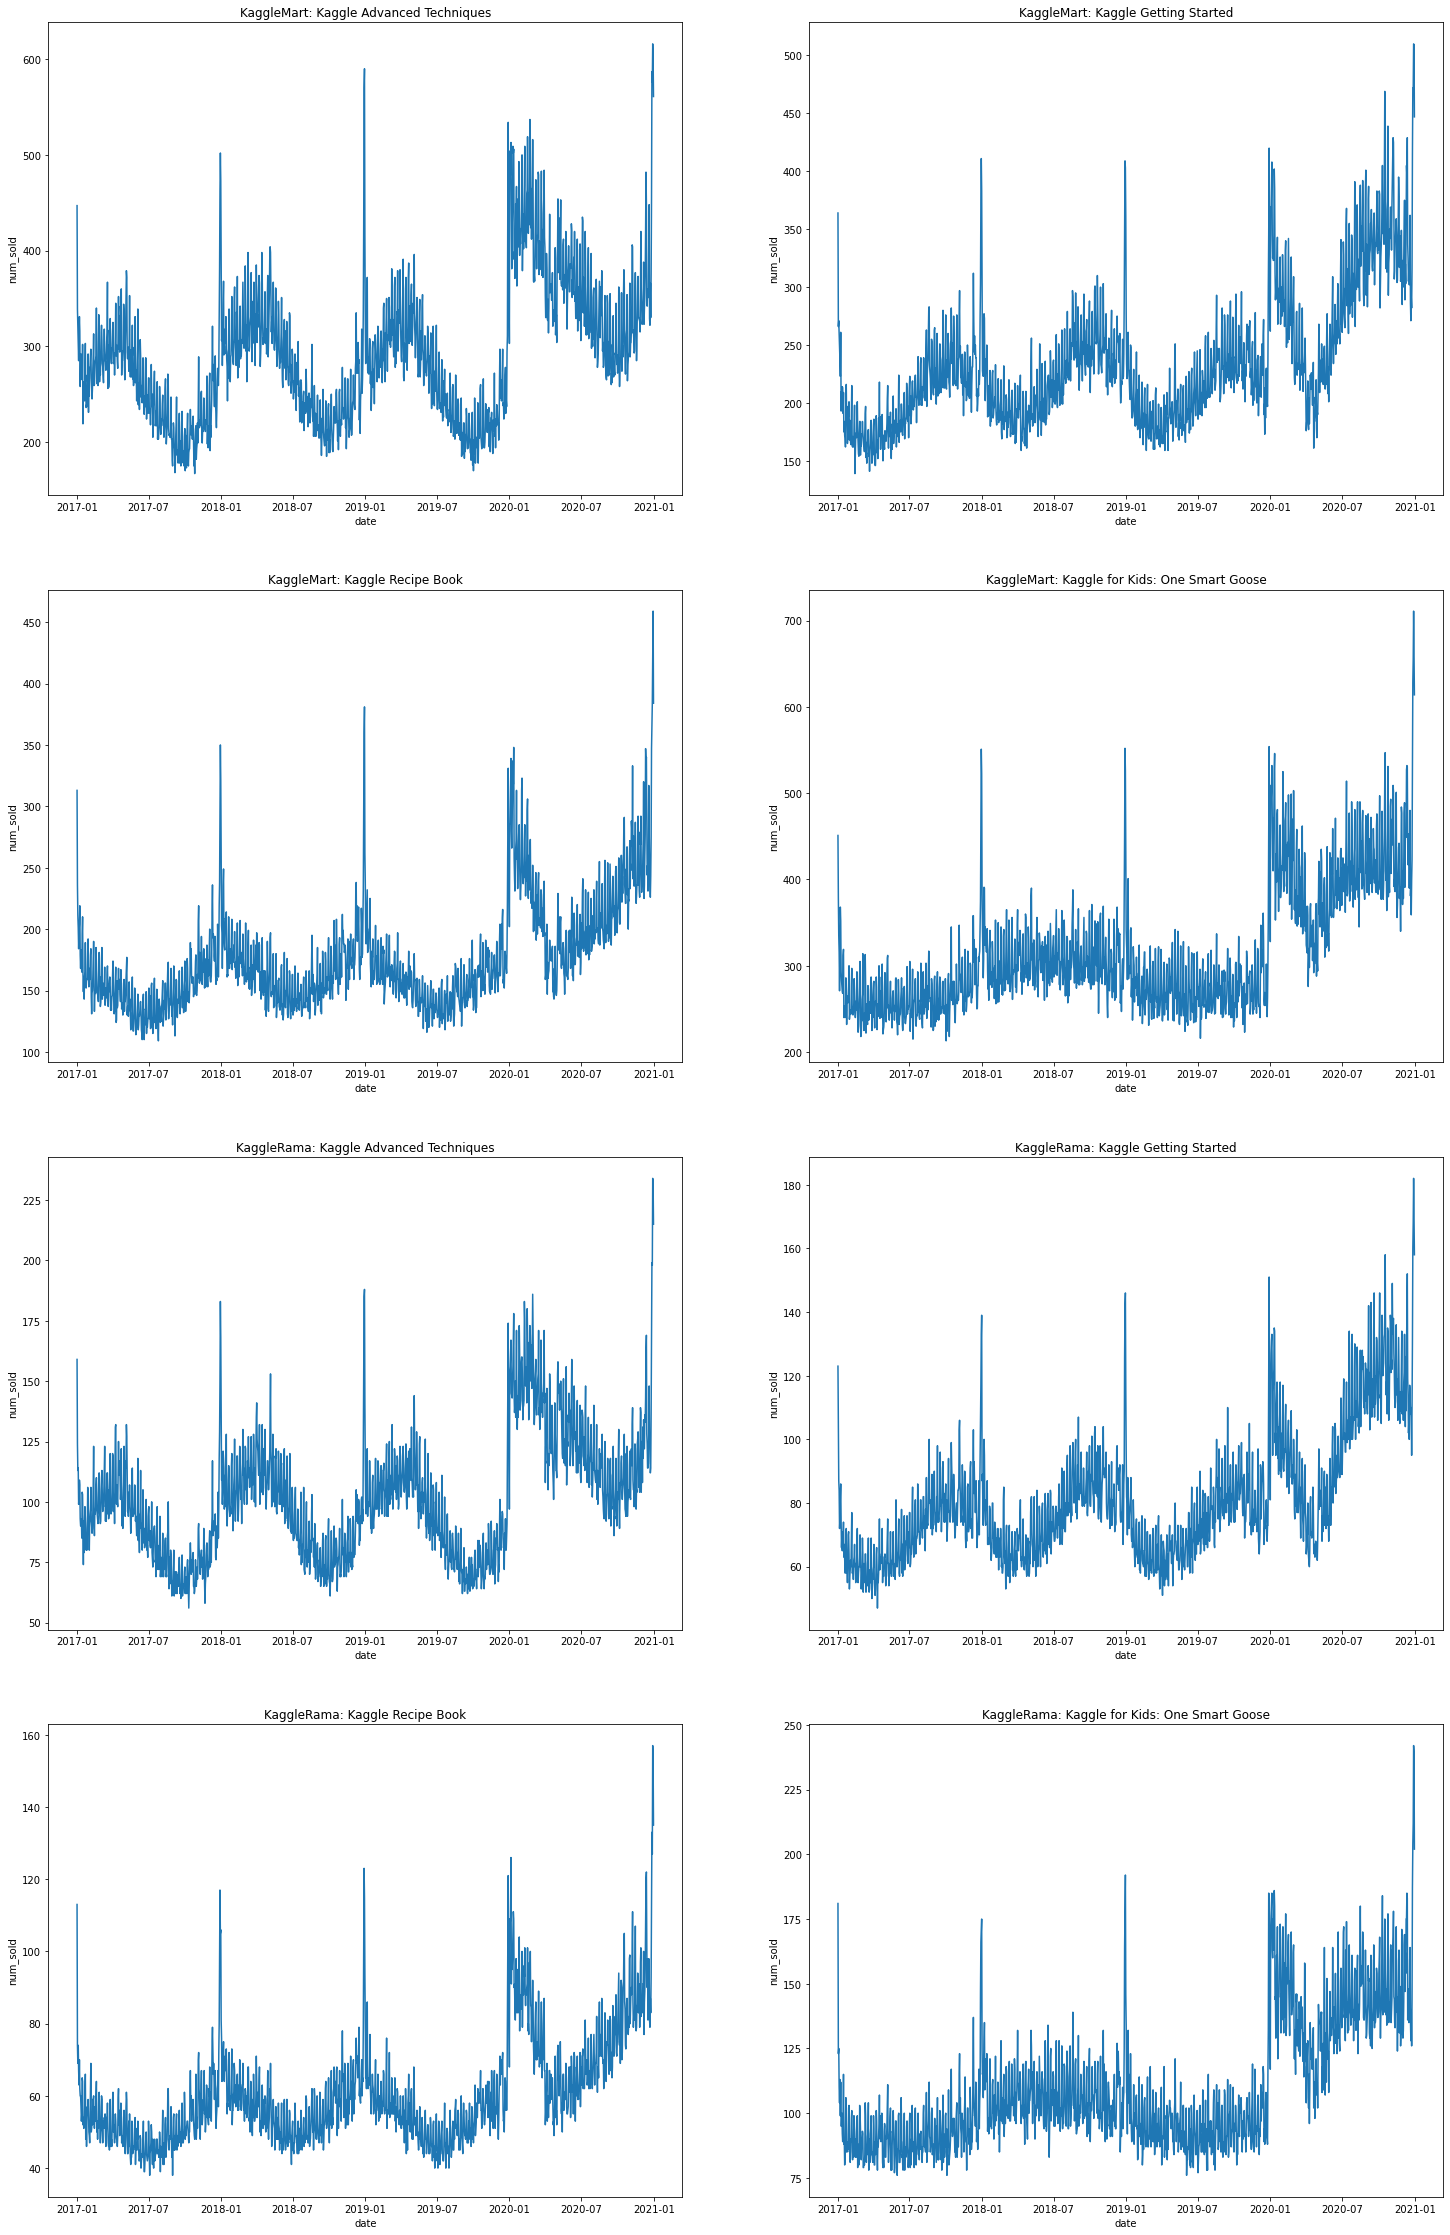

In [26]:
data_temp_1 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_2 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_3 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_4 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

data_temp_5 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp_6 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Getting Started')].reset_index(drop = True)
data_temp_7 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle Recipe Book')].reset_index(drop = True)
data_temp_8 = train[(train['country'] == 'Spain') & (train['store'] == 'KaggleRama') & (train['product'] == 'Kaggle for Kids: One Smart Goose')].reset_index(drop = True)

fig, axes = plt.subplots(4, 2, figsize = (25, 40))

sns.lineplot(ax = axes[0, 0], x = 'date', y = 'num_sold', data = data_temp_1).set(title = 'KaggleMart: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[0, 1], x = 'date', y = 'num_sold', data = data_temp_2).set(title = 'KaggleMart: Kaggle Getting Started')
sns.lineplot(ax = axes[1, 0], x = 'date', y = 'num_sold', data = data_temp_3).set(title = 'KaggleMart: Kaggle Recipe Book')
sns.lineplot(ax = axes[1, 1], x = 'date', y = 'num_sold', data = data_temp_4).set(title = 'KaggleMart: Kaggle for Kids: One Smart Goose')
sns.lineplot(ax = axes[2, 0], x = 'date', y = 'num_sold', data = data_temp_5).set(title = 'KaggleRama: Kaggle Advanced Techniques')
sns.lineplot(ax = axes[2, 1], x = 'date', y = 'num_sold', data = data_temp_6).set(title = 'KaggleRama: Kaggle Getting Started')
sns.lineplot(ax = axes[3, 0], x = 'date', y = 'num_sold', data = data_temp_7).set(title = 'KaggleRama: Kaggle Recipe Book')
sns.lineplot(ax = axes[3, 1], x = 'date', y = 'num_sold', data = data_temp_8).set(title = 'KaggleRama: Kaggle for Kids: One Smart Goose')

plt.show();

In [ ]:
test.head(10)

In [ ]:
test['product'].value_counts()

In [ ]:
test['store'].value_counts()

In [ ]:
test['country'].value_counts()